# Import the libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('yacht_hydrodynamics.data', header=None, sep=' ')

In [3]:
data.shape

(308, 7)

In [4]:
data.head()

,0,1,2,3,4,5,6
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


The features are:

1. Longitudinal position of the center of buoyancy, adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam-draught ratio, adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional.

And the target variable is
7. Residuary resistance per unit weight of displacement, adimensional.

In [5]:
cols = ['Long_pos_CoB','Prismatic_coef','Length_displacement_ratio','Beam_draught_ratio','Length_beam_ratio','Froude_number','Residuary_resistance_per_weight_displacement']

In [6]:
data.columns = cols

In [7]:
data.head()

,Long_pos_CoB,Prismatic_coef,Length_displacement_ratio,Beam_draught_ratio,Length_beam_ratio,Froude_number,Residuary_resistance_per_weight_displacement
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Long_pos_CoB                                  308 non-null    float64
 1   Prismatic_coef                                308 non-null    float64
 2   Length_displacement_ratio                     308 non-null    float64
 3   Beam_draught_ratio                            308 non-null    float64
 4   Length_beam_ratio                             308 non-null    float64
 5   Froude_number                                 308 non-null    float64
 6   Residuary_resistance_per_weight_displacement  308 non-null    float64
dtypes: float64(7)
memory usage: 17.0 KB


##### We see that there are no missing values. All good

In [9]:
data.describe()

,Long_pos_CoB,Prismatic_coef,Length_displacement_ratio,Beam_draught_ratio,Length_beam_ratio,Froude_number,Residuary_resistance_per_weight_displacement
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


# EDA

<AxesSubplot:xlabel='Residuary_resistance_per_weight_displacement', ylabel='Count'>

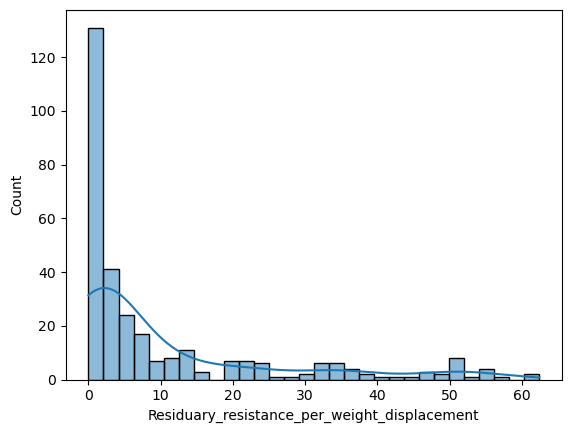

In [10]:
sns.histplot(data['Residuary_resistance_per_weight_displacement'], kde=True, bins=30)

We see that there is a very long tail that has very few occurences. This might create problems to our model and its performance. We can try to bring it to a more appropriate form by transforming it through a logarithmic transform.

<AxesSubplot:xlabel='Residuary_resistance_per_weight_displacement', ylabel='Count'>

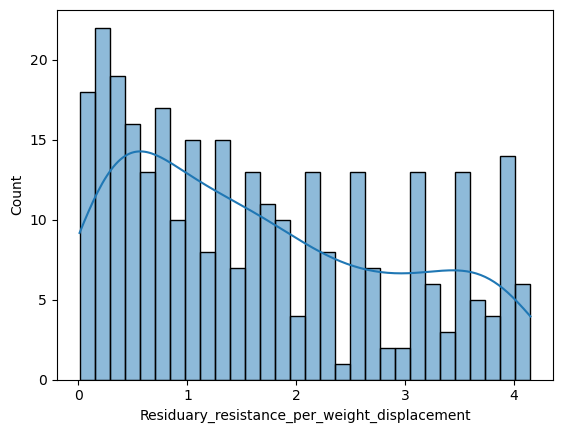

In [11]:
sns.histplot(np.log1p(data.iloc[:,-1]), kde=True, bins=30)

This looks better.

We can also look at the correlation between the features.

In [12]:
cor = data.corr()

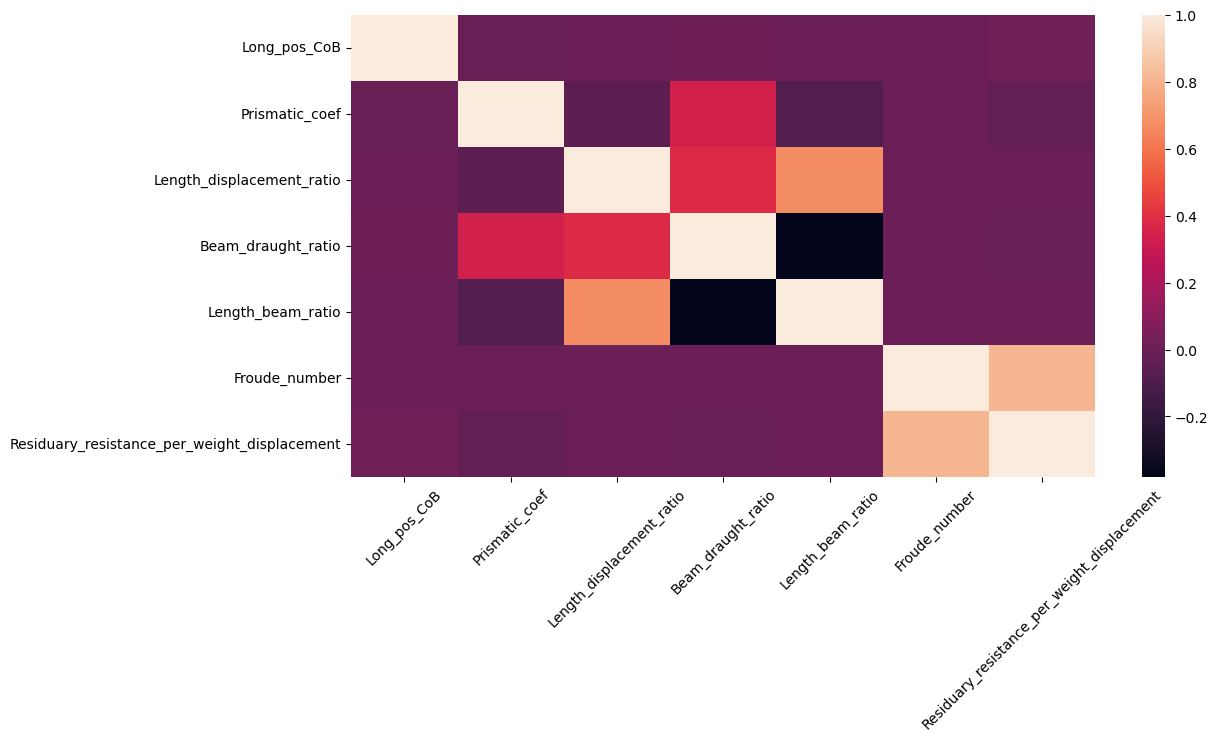

In [13]:
fig = plt.figure(figsize = (12,6))
sns.heatmap(cor)
plt.xticks(rotation=45);

In [14]:
cor['Residuary_resistance_per_weight_displacement']

Long_pos_CoB                                    0.019306
Prismatic_coef                                 -0.028569
Length_displacement_ratio                      -0.002967
Beam_draught_ratio                             -0.012421
Length_beam_ratio                              -0.001025
Froude_number                                   0.810092
Residuary_resistance_per_weight_displacement    1.000000
Name: Residuary_resistance_per_weight_displacement, dtype: float64

We see that the highest correlation for the target variable occurs with the Froude number.

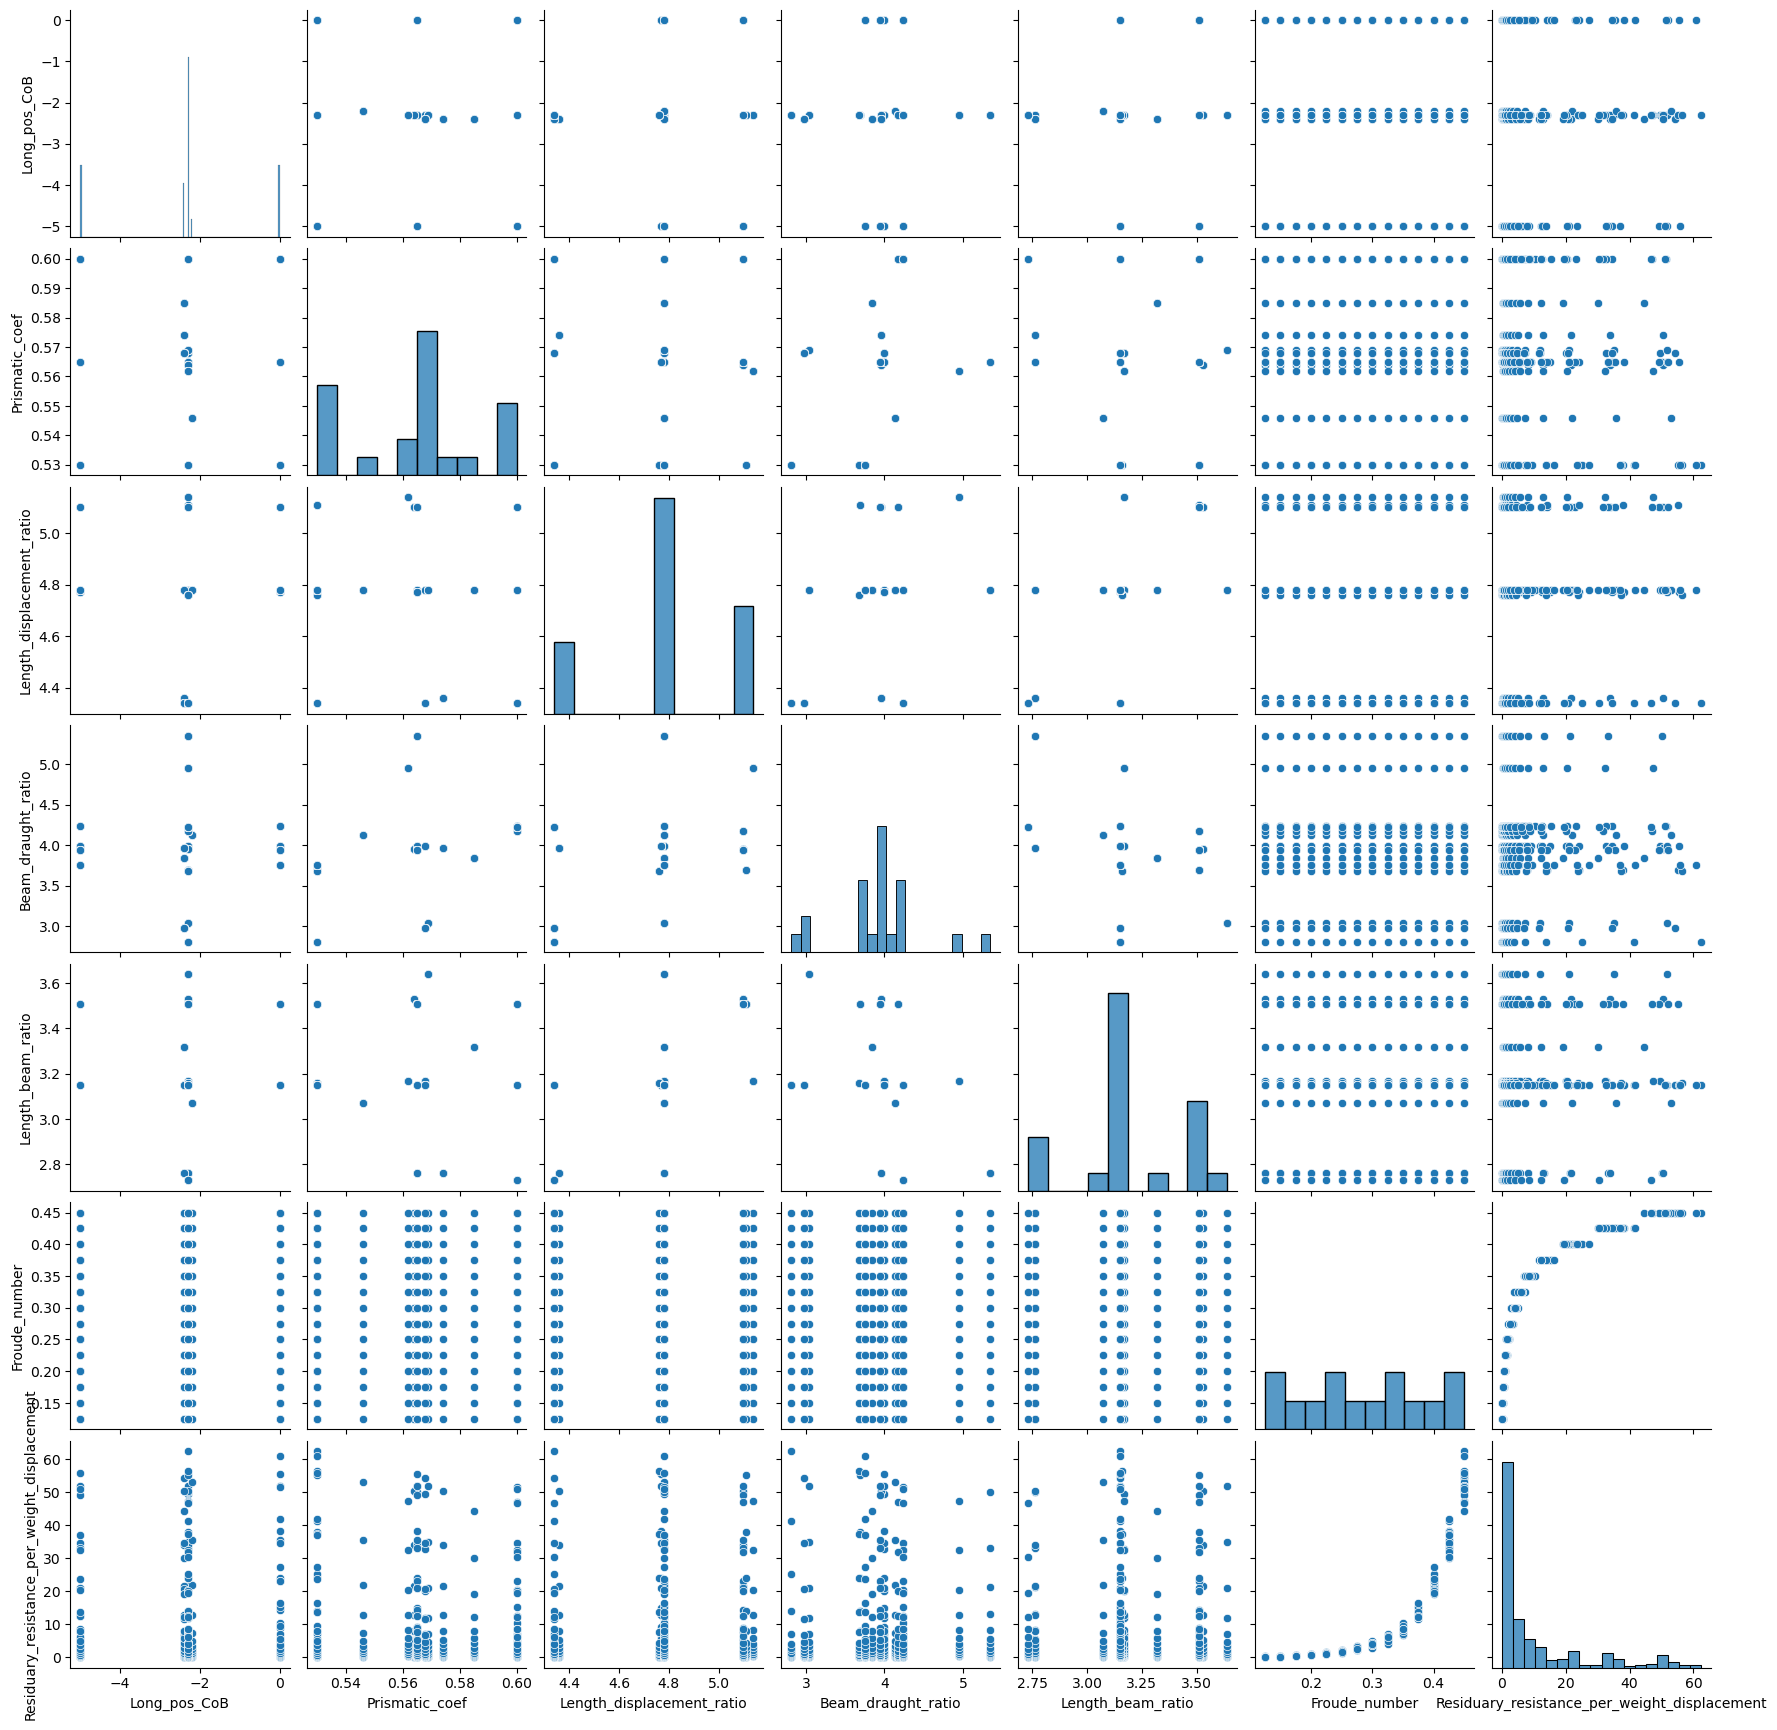

In [15]:
sns.pairplot(data)

# Set up the data

In [22]:
target = 'Residuary_resistance_per_weight_displacement'

y = data[target]
X = data.drop([target], axis=1)

# Fit the models

We'll try a simple Ridge Regression model, and we'll use the validation dataset to fine-tune the hyperparameter alpha.

## A baseline

Having a simple Ridge Regression model as our baseline, without any data transformation:

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
ridge_simple = Ridge(alpha=0)
ridge_simple.fit(X_train, y_train)

Ridge(alpha=0)

In [26]:
ridge_simple.score(X_test, y_test)

0.5450299966509135

In [27]:
y_pred_simple = ridge_simple.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred_simple)**0.5
RMSE

8.222082168071127

In [28]:
mean_absolute_percentage_error(y_test, y_pred_simple)

21.65845796537361

Terrible performance.

## Log-transformed target

If we log-transform the target to accommodate for the long tail of the distribution as seen before.

In [29]:
y = np.log1p(data[target])
X = data.drop([target], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
ridge = Ridge(alpha=0)
ridge.fit(X_train, y_train)

Ridge(alpha=0)

In [31]:
ridge.score(X_test, y_test)

0.9581468461584651

In [32]:
y_pred = ridge.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
RMSE

0.22578793874234362

In [34]:
mean_absolute_percentage_error(y_test, y_pred)

0.8042737038521954

## Model with Feature Engineering

Let's try an exponential of the Froude number as a feature. This is inspired by the relationship of the plot between the two quantities as observed in the EDA section.

In [35]:
X['Fr_exp'] = np.exp(X['Froude_number'])

In [36]:
X.head()

,Long_pos_CoB,Prismatic_coef,Length_displacement_ratio,Beam_draught_ratio,Length_beam_ratio,Froude_number,Fr_exp
0,-2.3,0.568,4.78,3.99,3.17,0.125,1.133148
1,-2.3,0.568,4.78,3.99,3.17,0.150,1.161834
2,-2.3,0.568,4.78,3.99,3.17,0.175,1.191246
3,-2.3,0.568,4.78,3.99,3.17,0.200,1.221403
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.252323


In [37]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 42)

In [38]:
ridge2 = Ridge(alpha=0)
ridge2.fit(X_train, y_train)

Ridge(alpha=0)

In [39]:
ridge2.score(X_test, y_test)

0.9960909412953007

In [40]:
y_pred2 = ridge2.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred2)**0.5
RMSE

0.06900375749286239

We see that there is an imporvement in the mean squared error.

In [41]:
mean_absolute_percentage_error(y_test, y_pred2)

0.18563801578028583

We see that on average, we have a 18% deviation from the true value. Which is a huge improvement from the 80% of the Ridge regression without the simple feature engineering.

# Conclusion

Froude number seems to be the most important feature when predicting the Residuary resistance per unit weight of displacement and there is a strong relationship of the target variable with the exponentiated Froude number.